In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Preprocessing

In [5]:
dataset=pd.read_csv("Loan.csv")

In [6]:
#Showing And Analysing Various Columns present in dataset
print(dataset.head())
dataset.shape

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

(614, 13)

In [7]:
#Checking and Handling Missing Values
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [9]:
#Describing dataset's Statistical Properties
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [10]:
# label encoding
dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-10-765495935.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [11]:
# Dependent column values
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [12]:
# replacing the value of 3+ to 4
dataset = dataset.replace(to_replace='3+', value=4)

In [13]:
# Dependent column values
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


# New Section

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

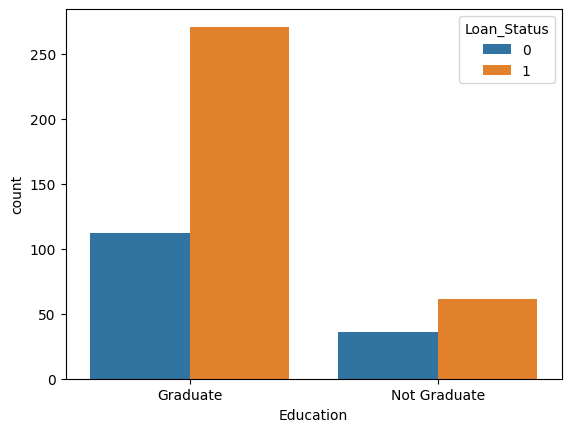

In [14]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

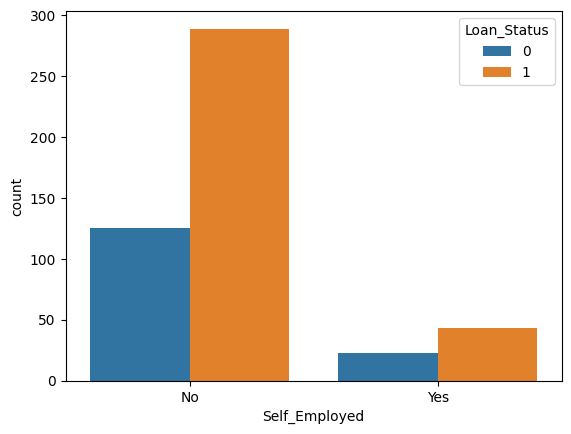

In [15]:
# Self_Employed & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=dataset)

<Axes: xlabel='Married', ylabel='count'>

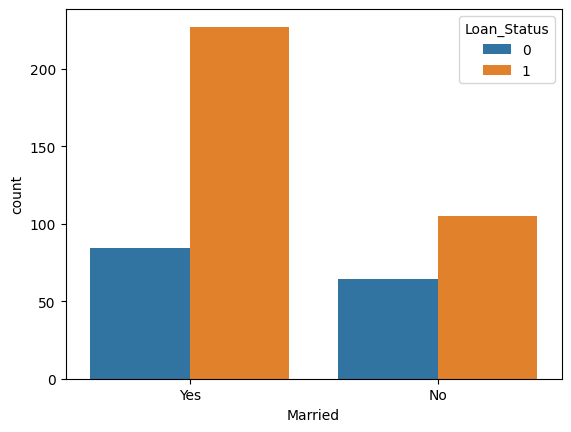

In [16]:
# Married & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=dataset)

In [17]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
Encoded=['Married','Gender','Self_Employed','Property_Area','Education']
for col in Encoded:
    dataset[col] = la.fit_transform(dataset[col])

In [18]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
# separating the data and label
X = dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = dataset['Loan_Status']

In [20]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
5         1        1          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          4          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


Various Classifiers and their Matrices Scores

*   Decission Trees
*   Naive Bayes
*   Support Vector Machine







Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
Decisions=DecisionTreeClassifier(random_state=42,max_leaf_nodes=3,max_features=2,max_depth=4)
Decisions.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, max_features=2, max_leaf_nodes=3,
                       random_state=42)

In [24]:
Y_predDecision=Decisions.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
Accuracy_Decision=accuracy_score(Y_test,Y_predDecision)
print('Accuracy Score',Accuracy_Decision)
print('Precision_Tree',precision_score(Y_test,Y_predDecision))
print('Recall _Score',recall_score(Y_test,Y_predDecision))
F1_Score_desc=f1_score(Y_test,Y_predDecision)
print('F1_Score',F1_Score_desc)

Accuracy Score 0.7604166666666666
Precision_Tree 0.7307692307692307
Recall _Score 0.9661016949152542
F1_Score 0.8321167883211679


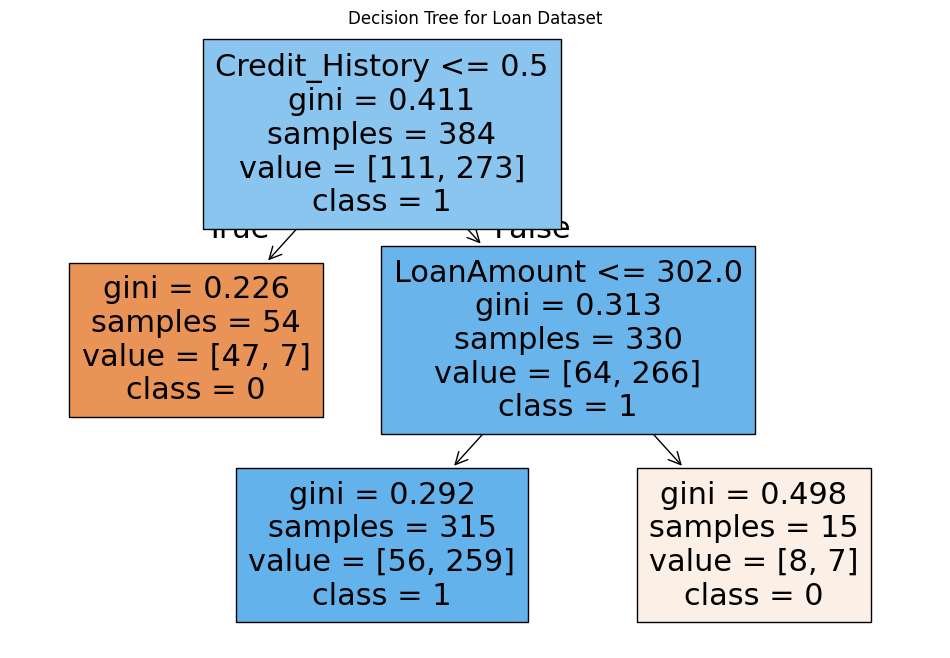

In [26]:
plt.figure(figsize=(12, 8))
plot_tree(Decisions, filled=True, feature_names=X.columns, class_names=['0','1'])
plt.title("Decision Tree for Loan Dataset")
plt.show()

Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

In [28]:
Y_PredNB=NB.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
Accuracy_NB=accuracy_score(Y_test,Y_PredNB)
print('Accuracy Score',Accuracy_NB)
print('Precision_Tree',precision_score(Y_test,Y_PredNB))
print('Recall _Score',recall_score(Y_test,Y_PredNB))
F1_Score_NB=f1_score(Y_test,Y_PredNB)
print('F1_Score',F1_Score_NB)

Accuracy Score 0.7708333333333334
Precision_Tree 0.7402597402597403
Recall _Score 0.9661016949152542
F1_Score 0.8382352941176471


Support Vector Machines

In [30]:
from  sklearn.svm import SVC
SVM=SVC(random_state=42,kernel='linear')
SVM.fit(X_train,Y_train)

SVC(kernel='linear', random_state=42)

In [32]:
Y_PredSVM=SVM.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
Accuracy_SVM=accuracy_score(Y_test,Y_PredSVM)
print("Accuracy_Score",Accuracy_SVM)
print('Precision_Tree',precision_score(Y_test,Y_PredSVM))
print('Recall _Score',recall_score(Y_test,Y_PredSVM))
F1_Score_SVM=f1_score(Y_test,Y_PredSVM)
print('F1_Score',F1_Score_SVM)

Accuracy_Score 0.65625
Precision_Tree 0.6547619047619048
Recall _Score 0.9322033898305084
F1_Score 0.7692307692307693


Knearest Neighbours

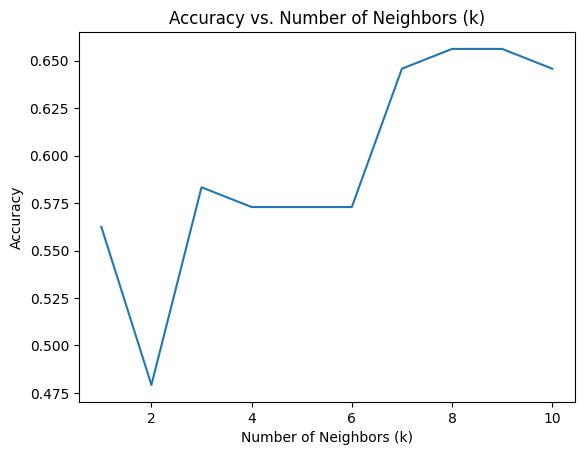

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize an empty list to store accuracy scores
accuracy_scores = []
for i in range(1, 11):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train, Y_train)
  # Predict on the test set
  Y_pred = KNN.predict(X_test)
  # Calculate and append the accuracy score
  accuracy_scores.append(accuracy_score(Y_test, Y_pred))

# Plot the accuracy scores for different values of k
plt.plot(range(1, 11), accuracy_scores)
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

From the above plot we can extractthat the number of optimal neighbours to be taken into consideration is 8.

In [35]:
KNN=KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train,Y_train)
Y_predict_KNN=KNN.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
Accuracy_KNN=accuracy_score(Y_test,Y_predict_KNN)
print("Accuracy_Score",Accuracy_KNN)
print('Precision_Tree',precision_score(Y_test,Y_predict_KNN))
print('Recall _Score',recall_score(Y_test,Y_predict_KNN))
F1_Score_KNN=f1_score(Y_test,Y_predict_KNN)
print('F1_Score',F1_Score_KNN)

Accuracy_Score 0.65625
Precision_Tree 0.6805555555555556
Recall _Score 0.8305084745762712
F1_Score 0.7480916030534351


Evaluating All the Models based upon their Accuracy Score

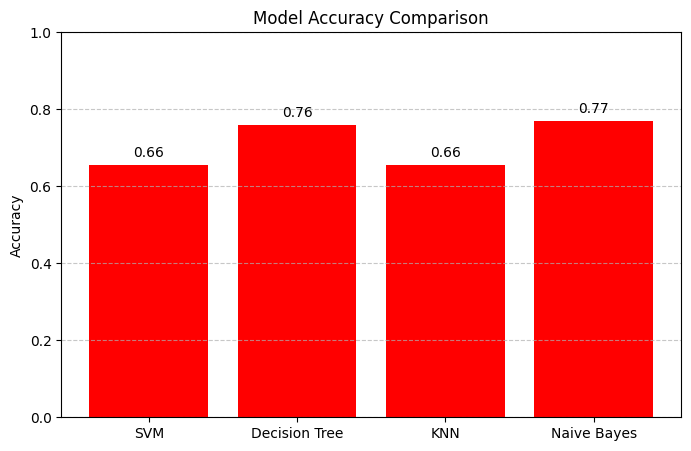

In [37]:
model_names = ['SVM', 'Decision Tree', 'KNN', 'Naive Bayes']
accuracies = [Accuracy_SVM,Accuracy_Decision, Accuracy_KNN,Accuracy_NB]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color='red')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()

Hence From the above figure it is depicted that Decisions Tree and Naive Byes are the best classifiers among all the four classifiers for this  dataset.

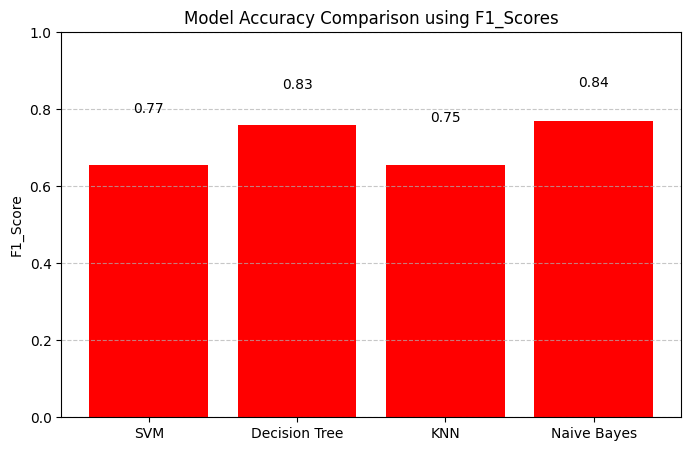

In [38]:
model_names = ['SVM', 'Decision Tree', 'KNN', 'Naive Bayes']
F1_Scores = [F1_Score_SVM,F1_Score_desc, F1_Score_KNN,F1_Score_NB]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color='red')
plt.ylabel('F1_Score')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison using F1_Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, f1 in enumerate(F1_Scores):
    plt.text(i, f1 + 0.02, f"{f1:.2f}", ha='center')
plt.show()